In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/Users/desgi/Desktop/extra ds projects from kaggle/Predictions/ford_car_pred/ford.csv')
df.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [3]:
df.shape

(17966, 9)

In [4]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [6]:
df=df.astype({'price':'float64','mileage':'float64', 'tax':'float64'})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  float64
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  float64
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  float64
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.2+ MB


In [8]:
df.model.unique()

array([' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ' C-MAX',
       ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
       ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
       ' Escort', ' Transit Tourneo', 'Focus'], dtype=object)

In [9]:
df.nunique().sort_values(ascending=True)

transmission        3
fuelType            5
engineSize         16
year               23
model              24
tax                36
mpg                90
price            3511
mileage         13528
dtype: int64

In [10]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

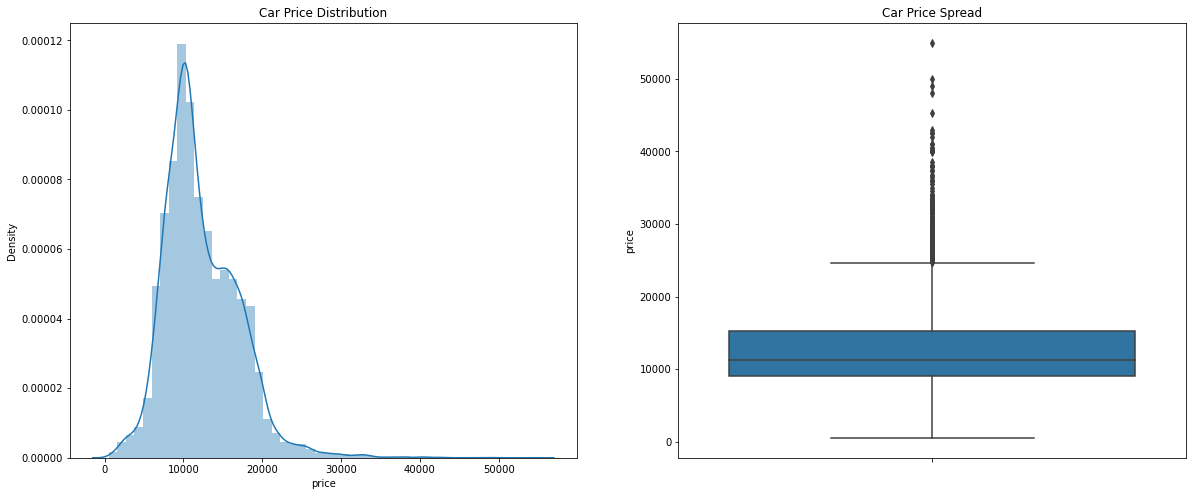

In [11]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)
plt.show()

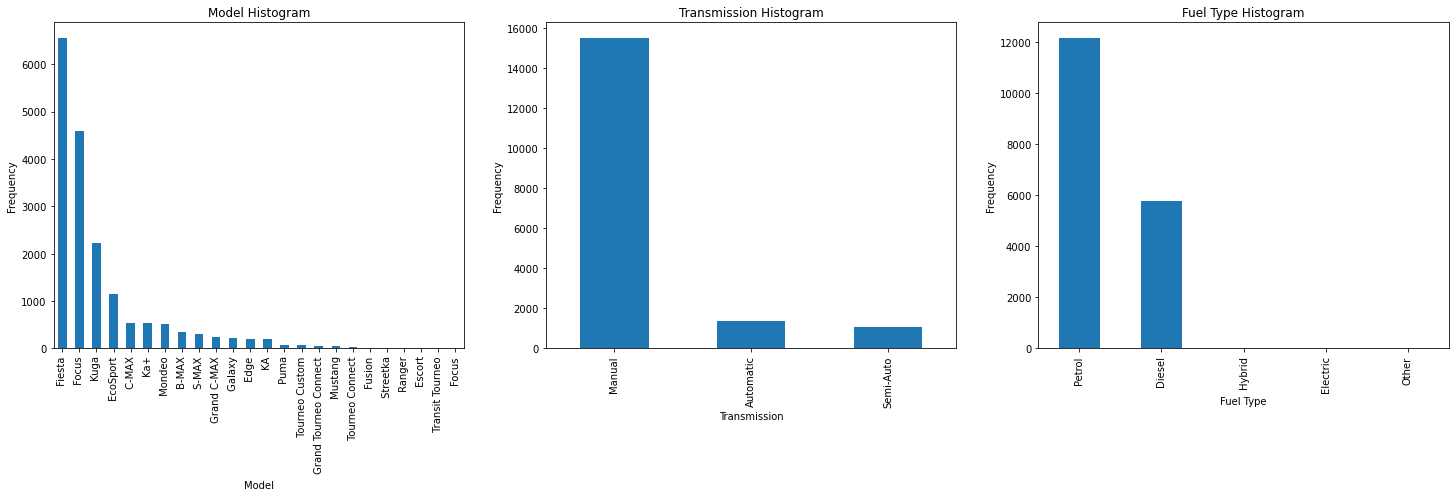

In [12]:
#Categorical var: model, transmission,fuelType
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt1=df.model.value_counts().plot(kind ='bar')
plt.title('Model Histogram')
plt1.set(xlabel = 'Model', ylabel= "Frequency")

plt.subplot(1,3,2)
plt1=df.transmission.value_counts().plot(kind='bar')
plt.title('Transmission Histogram')
plt1.set(xlabel = 'Transmission', ylabel= "Frequency")

plt.subplot(1,3,3)
plt1=df.fuelType.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel= "Frequency")

plt.show()

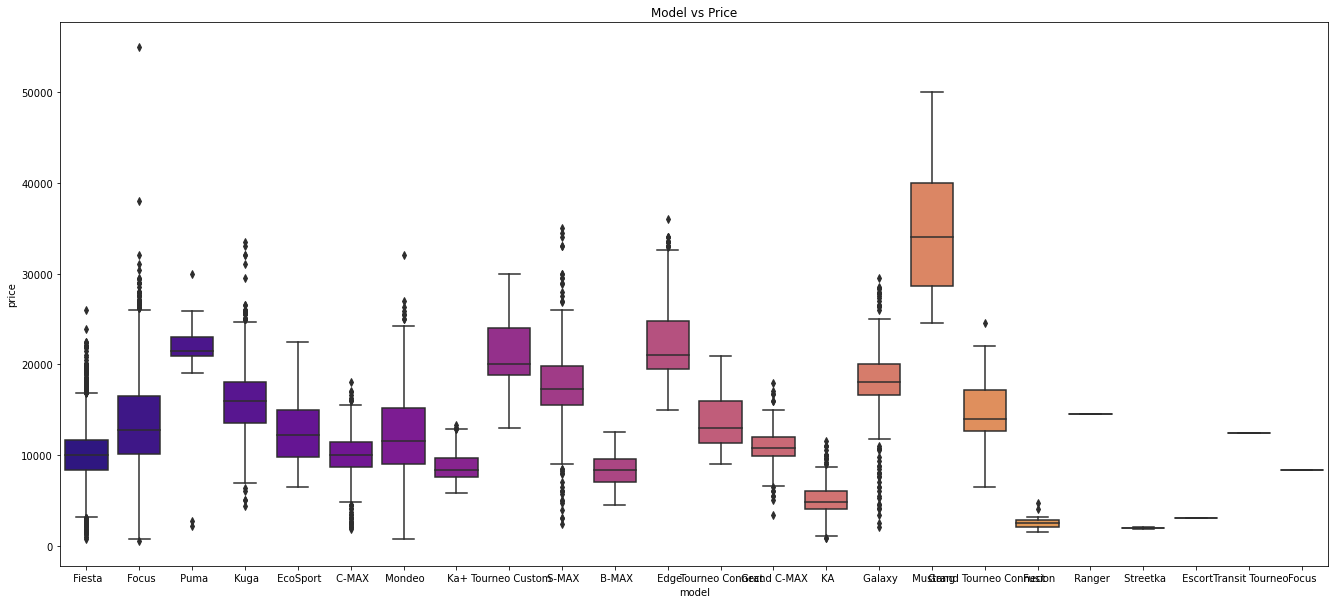

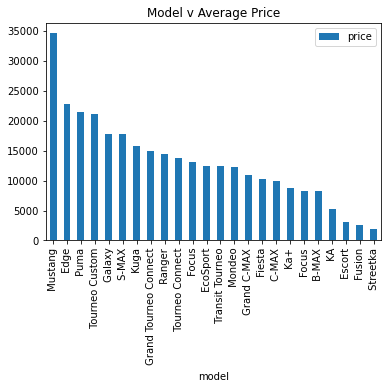

In [13]:
plt.figure(figsize=(50,10))

plt.subplot(1,2,1)
plt.title('Model vs Price')
sns.boxplot(x=df.model, y=df.price,palette=('plasma'))
plt.show()

dff=pd.DataFrame(df.groupby(['model'])['price'].mean().sort_values(ascending=False)).plot(kind='bar')
plt.title('Model v Average Price')
plt.show()

<Figure size 2880x1440 with 0 Axes>

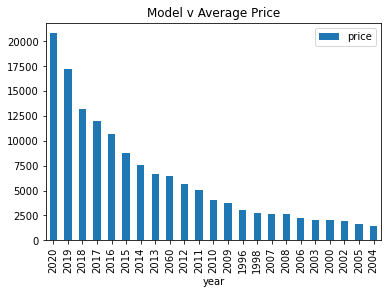

<Figure size 2880x1440 with 0 Axes>

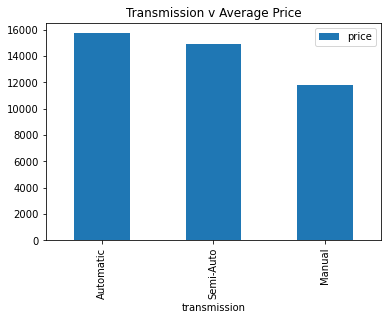

<Figure size 2880x1440 with 0 Axes>

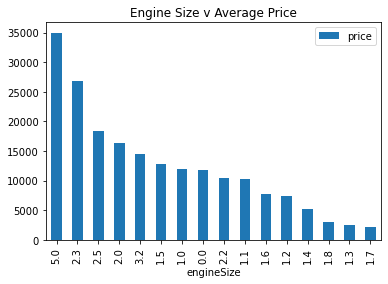

In [14]:
plt.figure(figsize=(40,20))

dff=pd.DataFrame(df.groupby(['year'])['price'].mean().sort_values(ascending=False)).plot(kind='bar')
plt.title('Model v Average Price')

plt.show()

plt.figure(figsize=(40,20))
dff=pd.DataFrame(df.groupby(['transmission'])['price'].mean().sort_values(ascending=False)).plot(kind='bar')
plt.title('Transmission v Average Price')
plt.show()

plt.figure(figsize=(40,20))
dff=pd.DataFrame(df.groupby(['engineSize'])['price'].mean().sort_values(ascending=False)).plot(kind='bar')
plt.title('Engine Size v Average Price')
plt.show()

In [15]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(df[x],palette=('plasma'))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' v Price')
    sns.boxplot(x=df[x], y=df.price,palette=('plasma'))

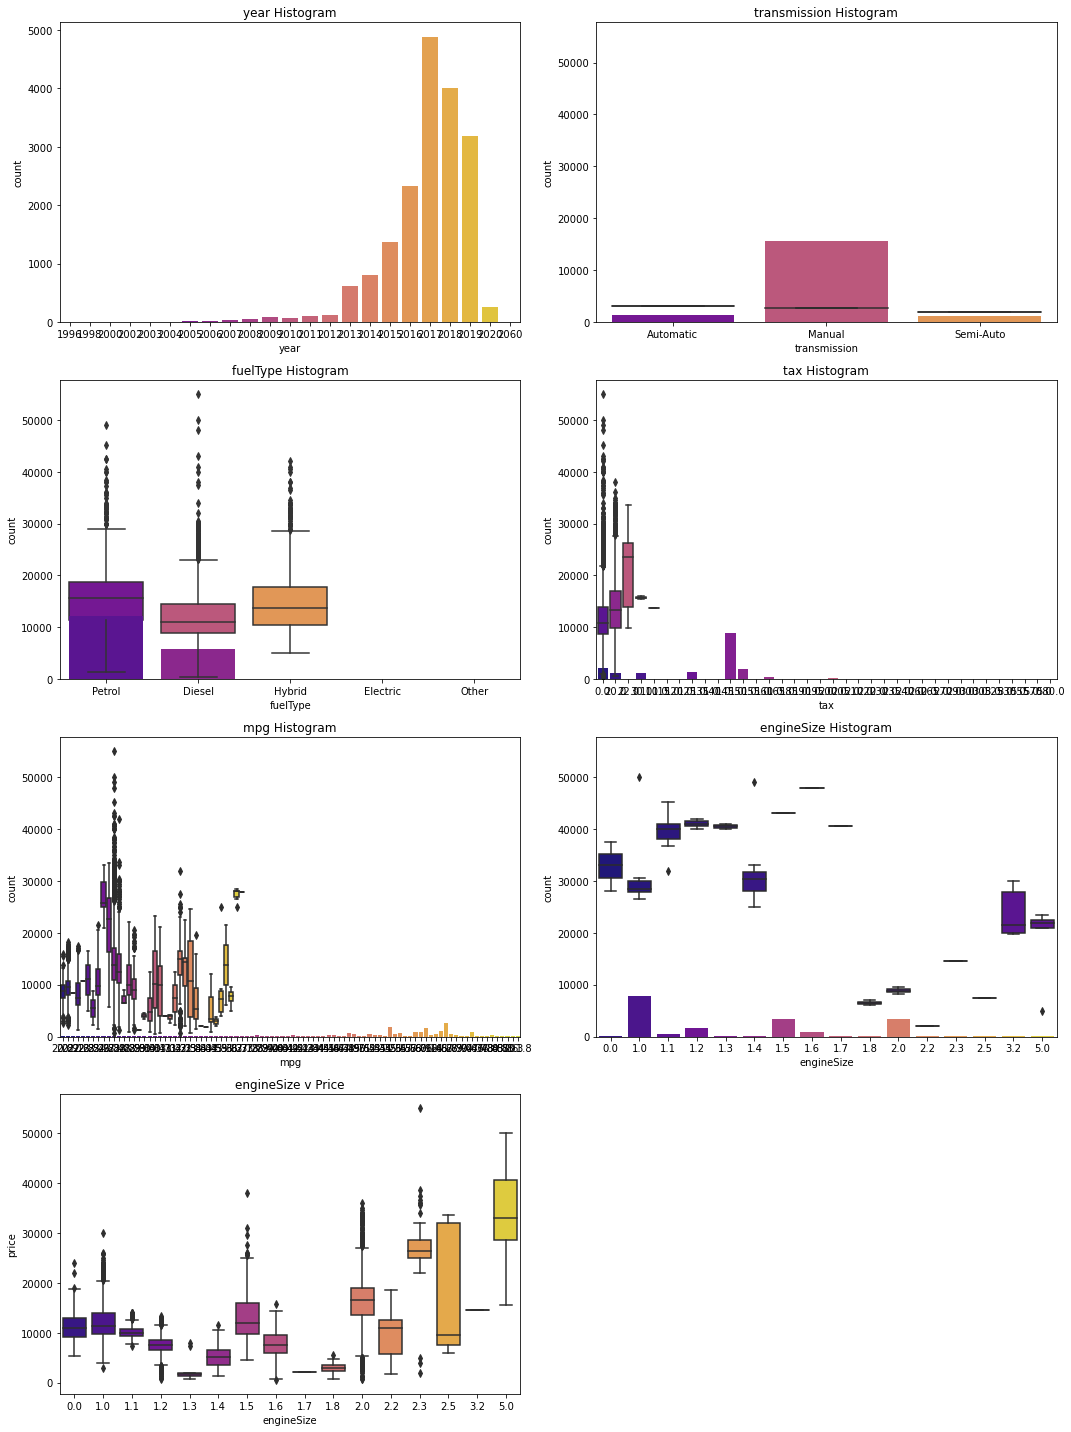

In [16]:
plt.figure(figsize=(15,20))
plot_count('year', 1)
plot_count('transmission', 2)
plot_count('fuelType', 3)
plot_count('tax', 4)
plot_count('mpg', 5)
plot_count('engineSize', 6)

plt.tight_layout()

In [17]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x], df['price'])
    plt.title(x + ' v Price')
    plt.ylabel('Price')
    plt.xlabel(x)

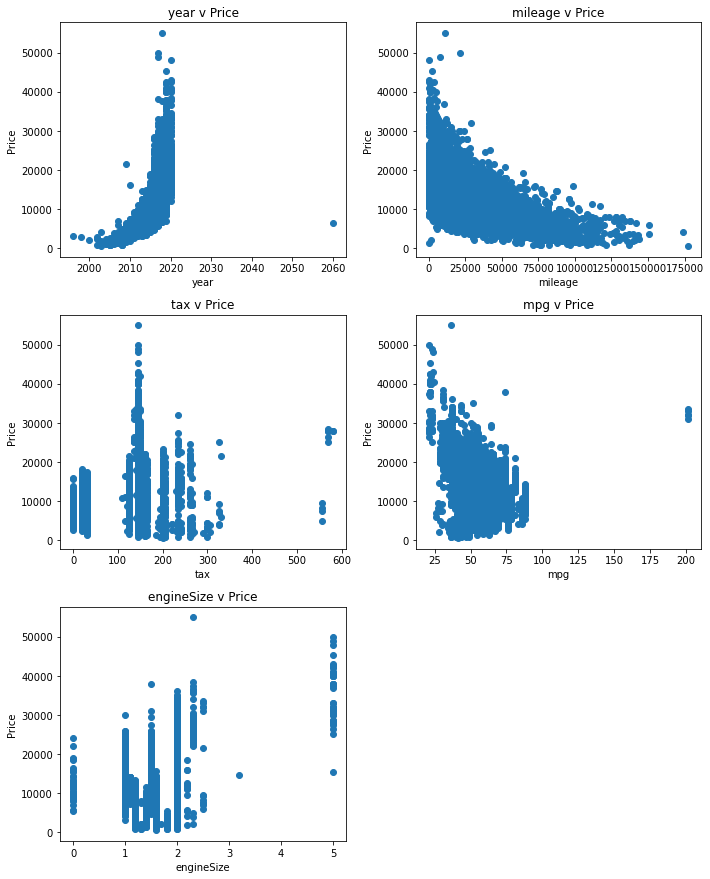

In [18]:
plt.figure(figsize=(10,20))

scatter('year', 1)
scatter('mileage', 2)
scatter('tax', 3)
scatter('mpg', 4)
scatter('engineSize', 5)

plt.tight_layout()

In [19]:
var=list(df.select_dtypes(include=['float64']).columns)

In [20]:
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method='yeo-johnson')
df[var]=sc_X.fit_transform(df[var])

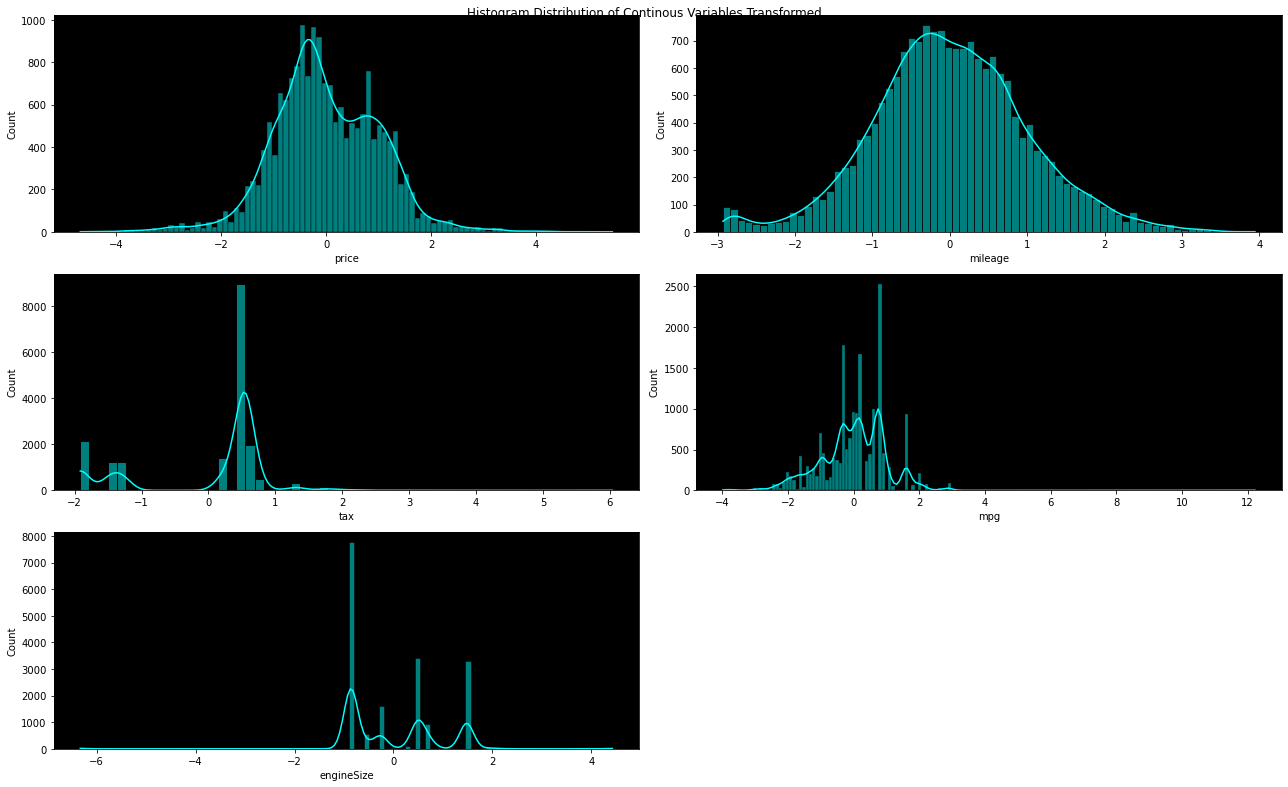

In [21]:
plt.figure(figsize=(18,18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor']='black'
    ax=plt.subplot(5,2,i+1)
    sns.histplot(data=df, x=col, ax=ax, color='cyan', kde=True)
    plt.suptitle('Histogram Distribution of Continous Variables Transformed')
    plt.tight_layout();

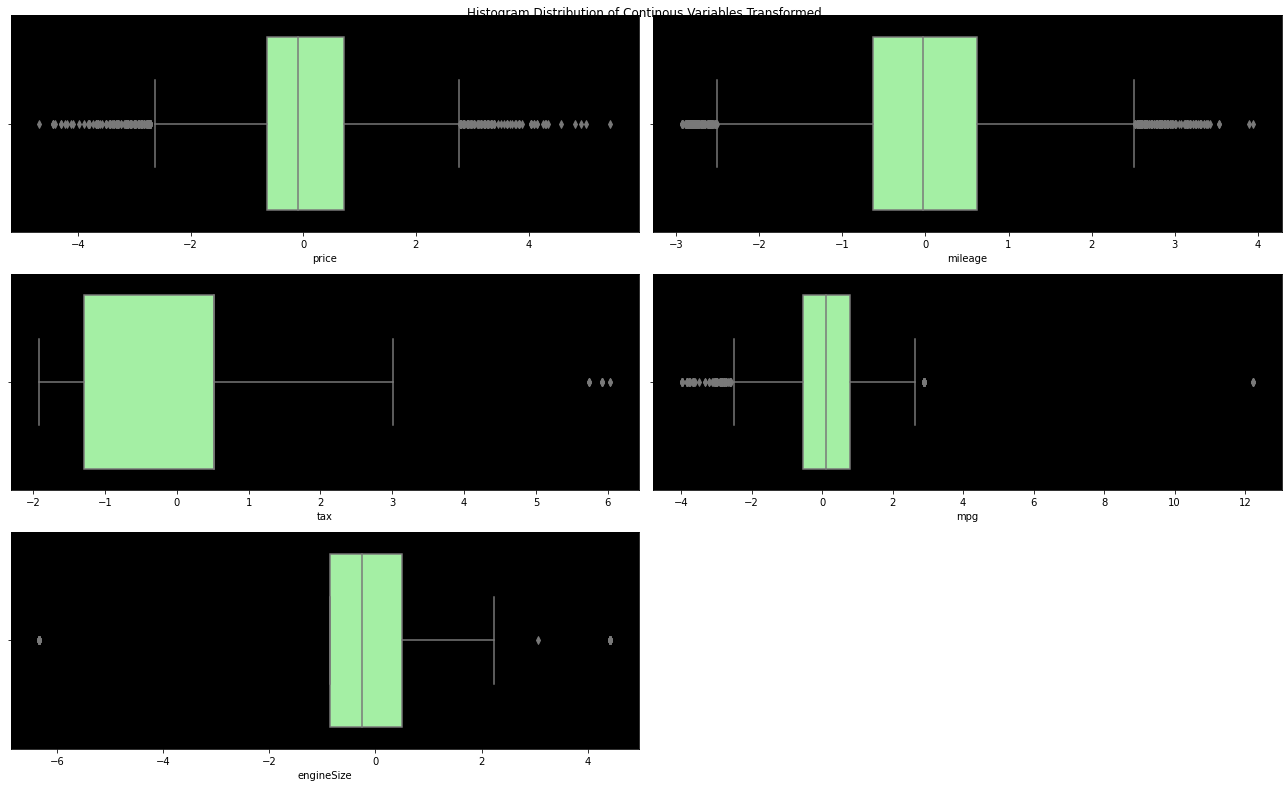

In [22]:
plt.figure(figsize=(18,18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor']='black'
    ax=plt.subplot(5,2,i+1)
    sns.boxplot(data=df, x=col, ax=ax, color='palegreen')
    plt.suptitle('Histogram Distribution of Continous Variables Transformed')
    plt.tight_layout();

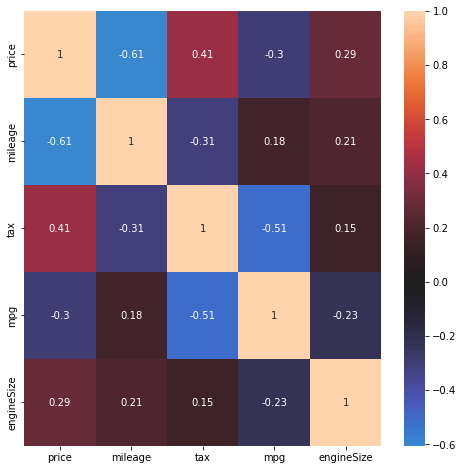

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(df.select_dtypes(include=['float64']).corr(),annot=True,center=0)
plt.show()

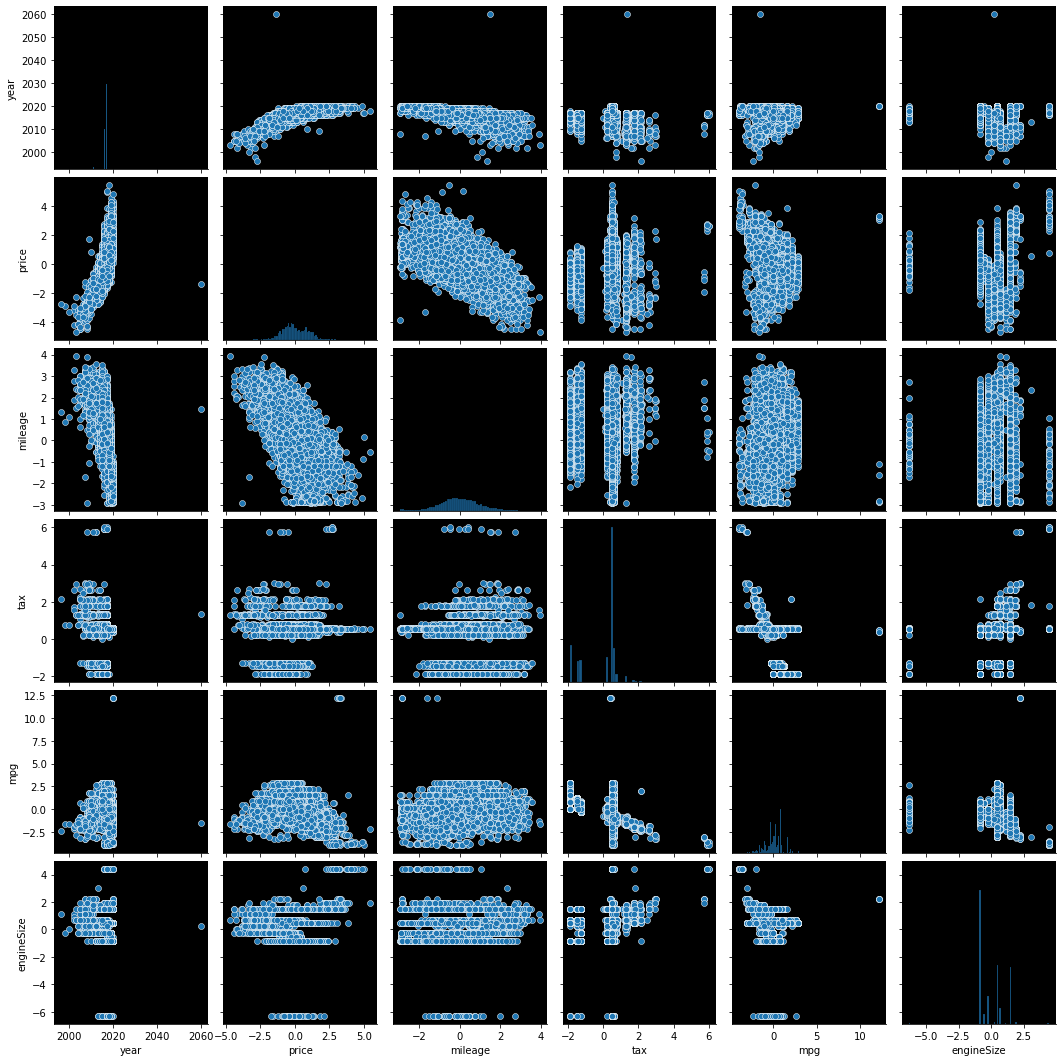

In [24]:
sns.pairplot(df)
plt.show()

In [25]:
def dummy(x,df):
    temp=pd.get_dummies(df[x], drop_first=True)
    df=pd.concat([df,temp],axis=1)
    df.drop([x], axis=1,inplace=True)
    return df

In [26]:
df=dummy('fuelType',df)
df=dummy('transmission',df)
df=dummy('model',df)

In [27]:
df.head(5)

,year,price,mileage,tax,mpg,engineSize,Electric,Hybrid,Other,Petrol,...,Mondeo,Mustang,Puma,Ranger,S-MAX,Streetka,Tourneo Connect,Tourneo Custom,Transit Tourneo,Focus
0,2017,0.056807,-0.174398,0.595980,-0.002419,-0.859333,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2018,0.469522,-0.712093,0.595980,-0.002419,-0.859333,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2017,0.268017,-0.424144,0.595980,-0.002419,-0.859333,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2019,1.112579,-0.587535,0.524249,-1.781132,0.493669,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2019,0.937553,-1.847451,0.524249,-0.906291,-0.859333,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test=train_test_split(df,train_size=0.8,test_size=0.2,random_state=100)

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
num_vars=['year','price','mileage','tax','mpg','engineSize']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [30]:
df_train.head()

,year,price,mileage,tax,mpg,engineSize,Electric,Hybrid,Other,Petrol,...,Mondeo,Mustang,Puma,Ranger,S-MAX,Streetka,Tourneo Connect,Tourneo Custom,Transit Tourneo,Focus
7120,0.338710,0.607130,0.246068,0.306780,0.343999,0.634456,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12040,0.354839,0.602410,0.007520,0.306780,0.252801,0.508677,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14512,0.290323,0.382585,0.805658,0.055564,0.322473,0.726110,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14368,0.274194,0.370688,0.548765,0.000000,0.293606,0.508677,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14609,0.306452,0.452912,0.415416,0.000000,0.368171,0.634456,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df_train.describe()

,year,price,mileage,tax,mpg,engineSize,Electric,Hybrid,Other,Petrol,...,Mondeo,Mustang,Puma,Ranger,S-MAX,Streetka,Tourneo Connect,Tourneo Custom,Transit Tourneo,Focus
count,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.0,14372.000000,...,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.0,14372.000000
mean,0.304400,0.483338,0.426506,0.241334,0.245575,0.588587,0.000070,0.000974,0.0,0.679168,...,0.028389,0.003131,0.004871,0.000070,0.016769,0.000070,0.002087,0.003409,0.0,0.000070
std,0.033158,0.102777,0.144766,0.125260,0.061622,0.092664,0.008341,0.031197,0.0,0.466813,...,0.166086,0.055870,0.069622,0.008341,0.128408,0.008341,0.045642,0.058293,0.0,0.008341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.290323,0.416112,0.335182,0.079093,0.212266,0.508677,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.306452,0.472969,0.422852,0.306780,0.252801,0.564341,0.000000,0.000000,0.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.322581,0.557226,0.517780,0.306780,0.293606,0.634456,0.000000,0.000000,0.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


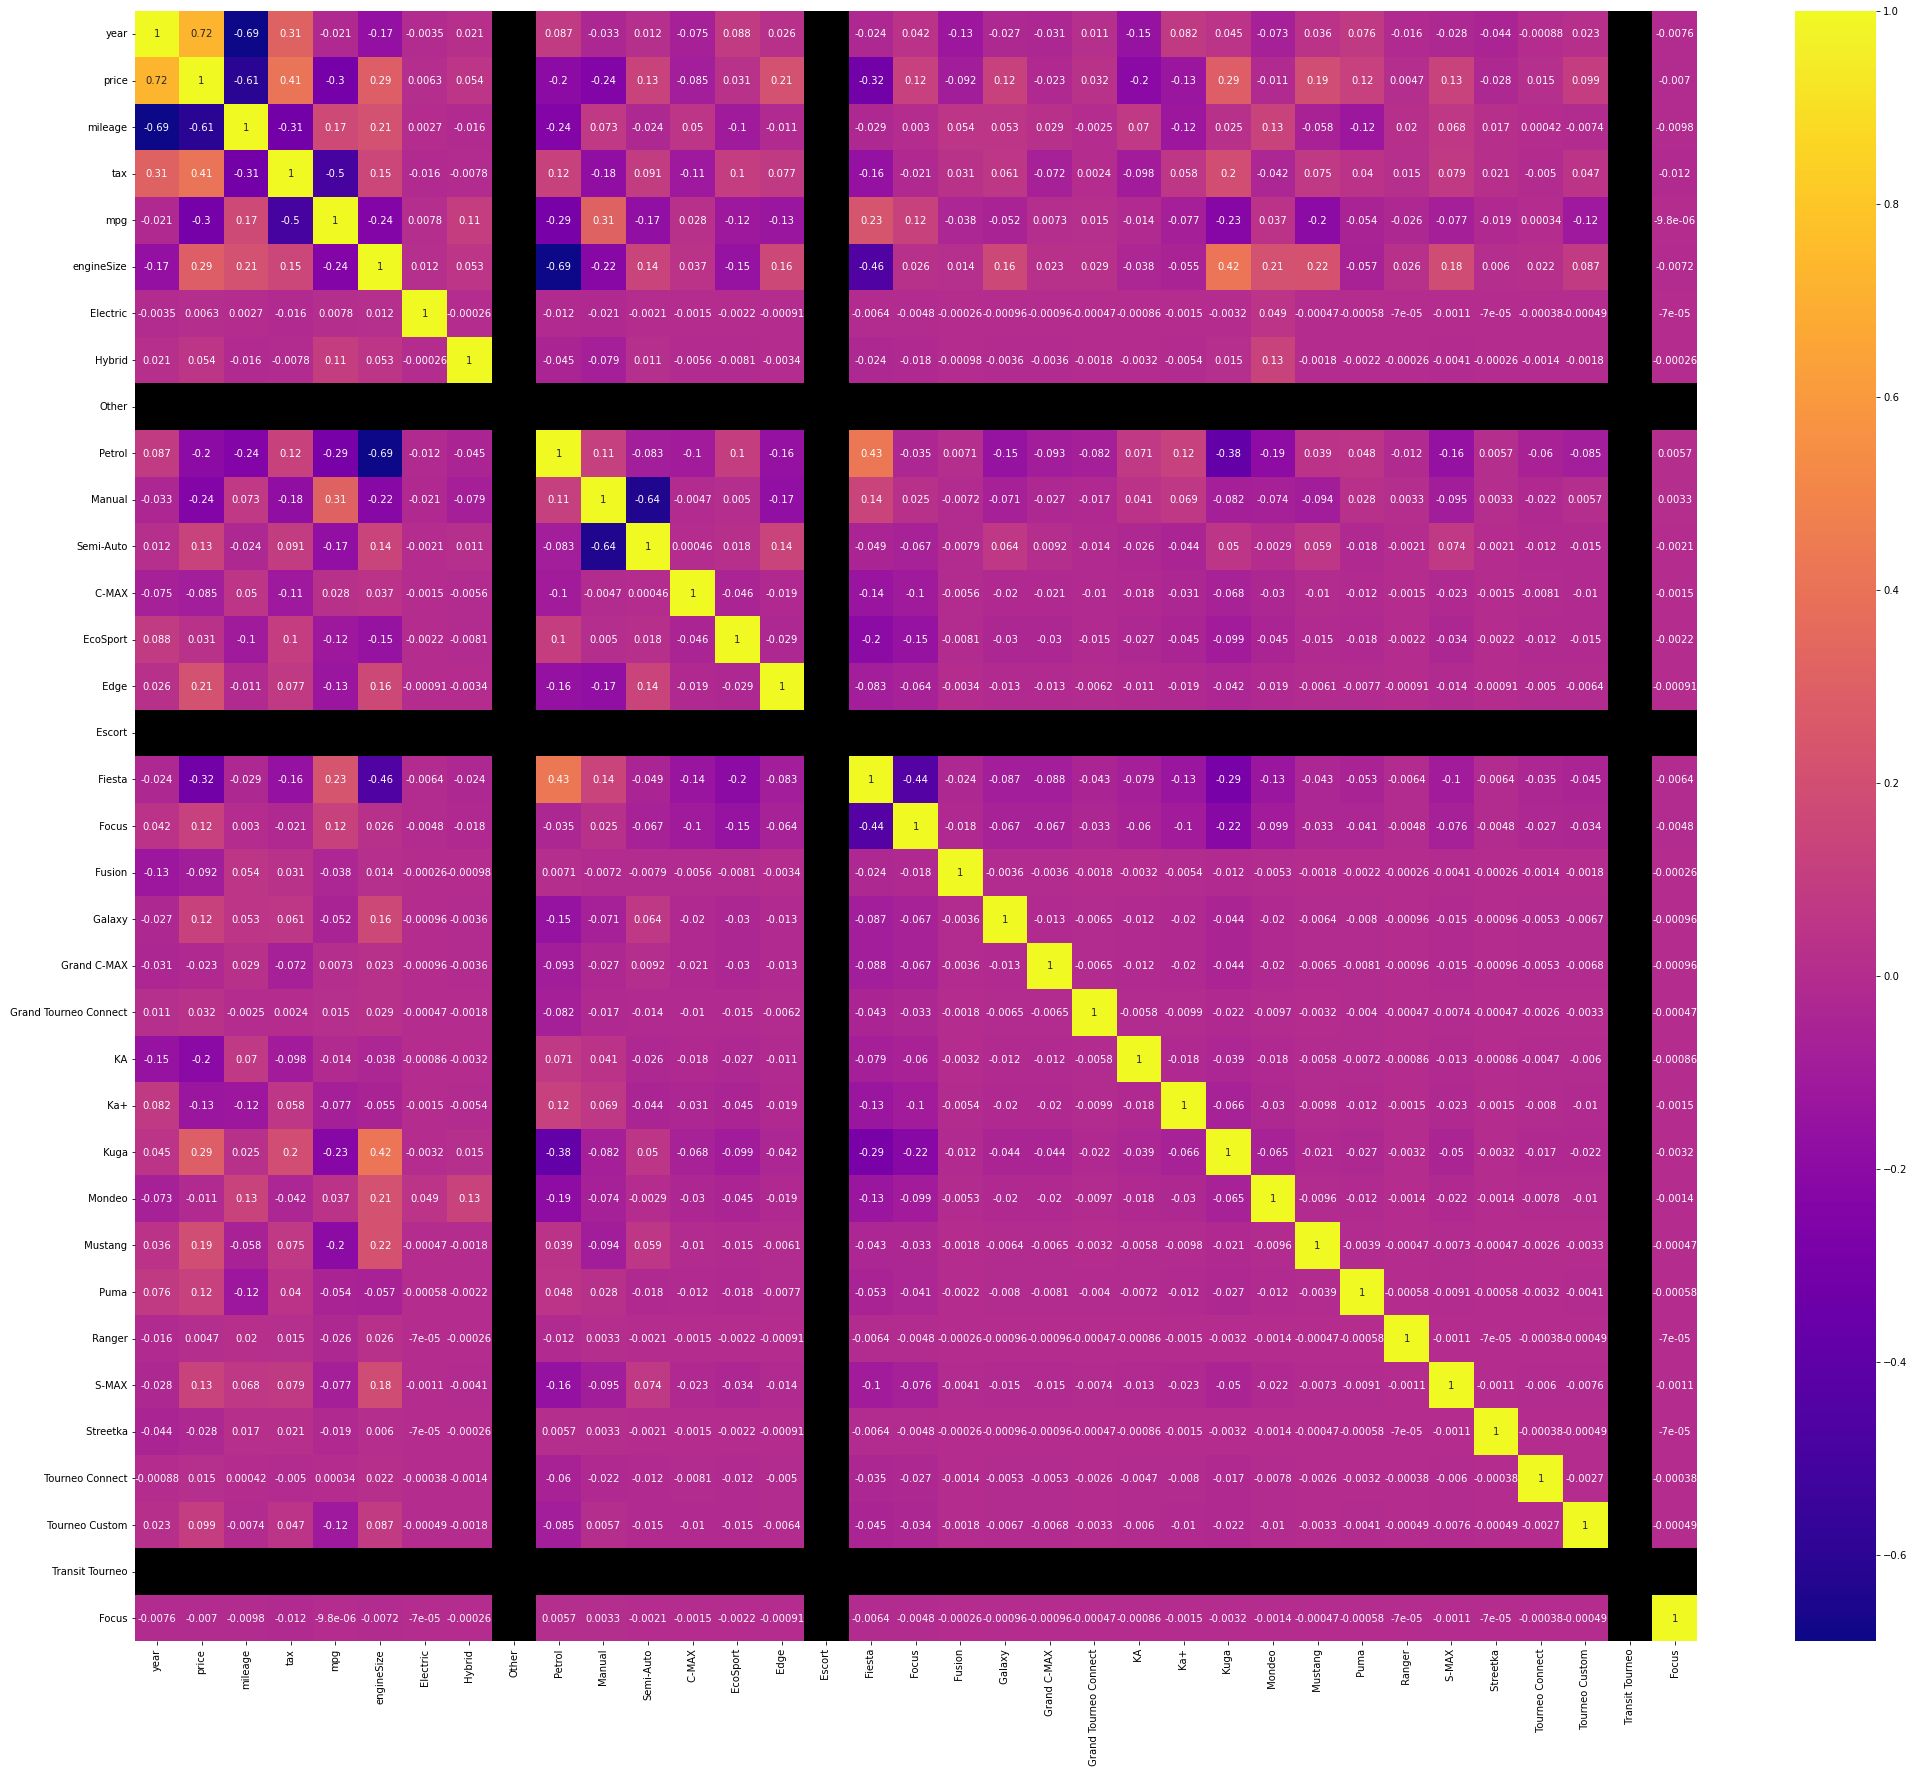

In [32]:
plt.figure(figsize = (35,30))
sns.heatmap(df_train.corr(),annot=True,cmap='plasma')
plt.show()

In [33]:
y_train=df_train.pop('price')
X_train=df_train

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,10)
rfe=rfe.fit(X_train,y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('mileage', True, 1),
 ('tax', False, 17),
 ('mpg', True, 1),
 ('engineSize', True, 1),
 ('Electric', False, 4),
 ('Hybrid', True, 1),
 ('Other', False, 23),
 ('Petrol', False, 22),
 ('Manual', False, 18),
 ('Semi-Auto', False, 21),
 (' C-MAX', False, 14),
 (' EcoSport', False, 13),
 (' Edge', True, 1),
 (' Escort', False, 24),
 (' Fiesta', False, 15),
 (' Focus', False, 10),
 (' Fusion', False, 20),
 (' Galaxy', False, 2),
 (' Grand C-MAX', False, 12),
 (' Grand Tourneo Connect', False, 8),
 (' KA', True, 1),
 (' Ka+', True, 1),
 (' Kuga', False, 7),
 (' Mondeo', False, 11),
 (' Mustang', True, 1),
 (' Puma', False, 3),
 (' Ranger', True, 1),
 (' S-MAX', False, 5),
 (' Streetka', False, 19),
 (' Tourneo Connect', False, 9),
 (' Tourneo Custom', False, 6),
 (' Transit Tourneo', False, 25),
 ('Focus', False, 16)]

In [37]:
X_train.columns[rfe.support_]

Index(['year', 'mileage', 'mpg', 'engineSize', 'Hybrid', ' Edge', ' KA',
       ' Ka+', ' Mustang', ' Ranger'],
      dtype='object')

In [38]:
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe.head(5)

,year,mileage,mpg,engineSize,Hybrid,Edge,KA,Ka+,Mustang,Ranger
7120,0.338710,0.246068,0.343999,0.634456,0,0,0,0,0,0
12040,0.354839,0.007520,0.252801,0.508677,0,0,0,0,0,0
14512,0.290323,0.805658,0.322473,0.726110,0,0,0,0,0,0
14368,0.274194,0.548765,0.293606,0.508677,0,0,0,0,0,0
14609,0.306452,0.415416,0.368171,0.634456,0,0,0,0,0,0


In [39]:
def build_model(X,y):
    X=sm.add_constant(X)
    lm=sm.OLS(y,X).fit()
    print(lm.summary())
    return X

In [40]:
def checkVIF(X):
    vif=pd.DataFrame()
    vif['Features']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by = 'VIF', ascending=False)
    return(vif)

In [41]:
X_train_new=build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     6250.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:15:59   Log-Likelihood:                 24361.
No. Observations:               14372   AIC:                        -4.870e+04
Df Residuals:                   14361   BIC:                        -4.862e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1651      0.007    -25.308      0.0

In [42]:
X_train_new=X_train_rfe.drop([' Ranger'],axis=1)

In [43]:
X_train_new.head(5)

,year,mileage,mpg,engineSize,Hybrid,Edge,KA,Ka+,Mustang
7120,0.338710,0.246068,0.343999,0.634456,0,0,0,0,0
12040,0.354839,0.007520,0.252801,0.508677,0,0,0,0,0
14512,0.290323,0.805658,0.322473,0.726110,0,0,0,0,0
14368,0.274194,0.548765,0.293606,0.508677,0,0,0,0,0
14609,0.306452,0.415416,0.368171,0.634456,0,0,0,0,0


In [44]:
X_train_new=build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     6944.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:15:59   Log-Likelihood:                 24360.
No. Observations:               14372   AIC:                        -4.870e+04
Df Residuals:                   14362   BIC:                        -4.862e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1652      0.007    -25.313      0.0

In [45]:
checkVIF(X_train_new)

,Features,VIF
0,const,309.80
2,mileage,2.11
1,year,1.99
4,engineSize,1.23
3,mpg,1.20
9,Mustang,1.09
6,Edge,1.04
7,KA,1.03
5,Hybrid,1.02
8,Ka+,1.02


In [46]:
lm =sm.OLS(y_train,X_train_new).fit()
y_train_price=lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

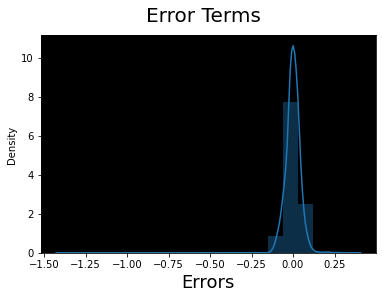

In [47]:
fig=plt.figure()
sns.distplot((y_train-y_train_price),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors', fontsize=18)

In [48]:
num_vars=['year','price','mileage','tax','mpg','engineSize']
df_test[num_vars]=scaler.fit_transform(df_test[num_vars])

In [60]:
y_test=df_test.pop('price')

KeyError: 'price'

In [61]:
X_test=df_test

In [62]:
X_train_new=X_train_new.drop('const',axis=1)
X_test_new=X_test[X_train_new.columns]
X_test_new=sm.add_constant(X_test_new)

KeyError: "['const'] not found in axis"

In [63]:
y_pred=lm.predict(X_test_new)

In [64]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-107.24544418796552

Text(0, 0.5, 'y_pred')

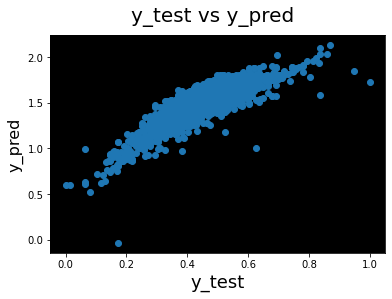

In [54]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)  

In [55]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     6944.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:15:59   Log-Likelihood:                 24360.
No. Observations:               14372   AIC:                        -4.870e+04
Df Residuals:                   14362   BIC:                        -4.862e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1652      0.007    -25.313      0.0